# BERTimental : sentiment analysis with RoBERTa 

University project

In [1]:
# from huggingface_hub import notebook_login

# notebook_login()

## Exploration et analyse du dataset

In [2]:
from datasets import load_dataset

# Go emotions

dataset = load_dataset("go_emotions", "simplified")

### Format des données

In [3]:
print(dataset)

dataset["train"][0]

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})


{'text': "My favourite food is anything I didn't have to cook myself.",
 'labels': [27],
 'id': 'eebbqej'}

In [4]:
# max of emotions per text

max(len(labels) for labels in dataset["train"]["labels"])

5

In [5]:
# labels

print(dataset["train"].features["labels"].feature.names)

['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


In [6]:
label2id = {label: i for i, label in enumerate(dataset["train"].features["labels"].feature.names)}
id2label = {i: label for label, i in label2id.items()}

labels2ids = lambda labels: [label2id[label] for label in labels]
ids2labels = lambda ids: [id2label[id] for id in ids]

print(label2id)
print(id2label)

{'admiration': 0, 'amusement': 1, 'anger': 2, 'annoyance': 3, 'approval': 4, 'caring': 5, 'confusion': 6, 'curiosity': 7, 'desire': 8, 'disappointment': 9, 'disapproval': 10, 'disgust': 11, 'embarrassment': 12, 'excitement': 13, 'fear': 14, 'gratitude': 15, 'grief': 16, 'joy': 17, 'love': 18, 'nervousness': 19, 'optimism': 20, 'pride': 21, 'realization': 22, 'relief': 23, 'remorse': 24, 'sadness': 25, 'surprise': 26, 'neutral': 27}
{0: 'admiration', 1: 'amusement', 2: 'anger', 3: 'annoyance', 4: 'approval', 5: 'caring', 6: 'confusion', 7: 'curiosity', 8: 'desire', 9: 'disappointment', 10: 'disapproval', 11: 'disgust', 12: 'embarrassment', 13: 'excitement', 14: 'fear', 15: 'gratitude', 16: 'grief', 17: 'joy', 18: 'love', 19: 'nervousness', 20: 'optimism', 21: 'pride', 22: 'realization', 23: 'relief', 24: 'remorse', 25: 'sadness', 26: 'surprise', 27: 'neutral'}


In [7]:
for i in range(5):
    entry = dataset["train"][i]
    print(entry["text"])
    print("is:", *ids2labels(entry["labels"]), sep="\n  - ")
    print()

My favourite food is anything I didn't have to cook myself.
is:
  - neutral

Now if he does off himself, everyone will think hes having a laugh screwing with people instead of actually dead
is:
  - neutral

WHY THE FUCK IS BAYLESS ISOING
is:
  - anger

To make her feel threatened
is:
  - fear

Dirty Southern Wankers
is:
  - annoyance



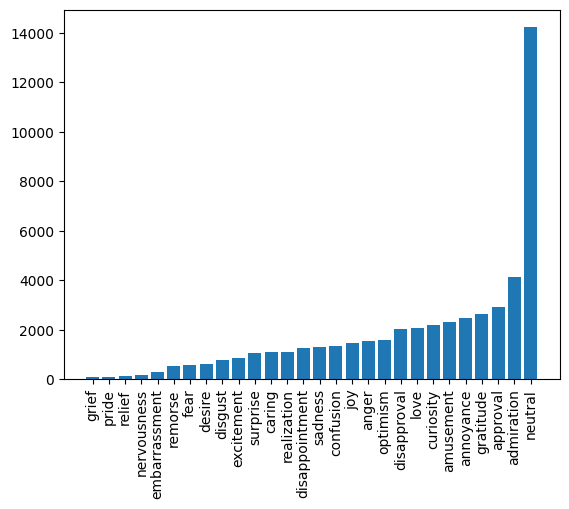

In [8]:
import matplotlib.pyplot as plt
from collections import Counter

labels = [id2label[label] for labels in dataset["train"]["labels"] for label in labels]
counter = Counter(labels)

counter = dict(sorted(counter.items(), key=lambda item: item[1]))

plt.bar(counter.keys(), counter.values())
plt.xticks(rotation=90)
plt.show()

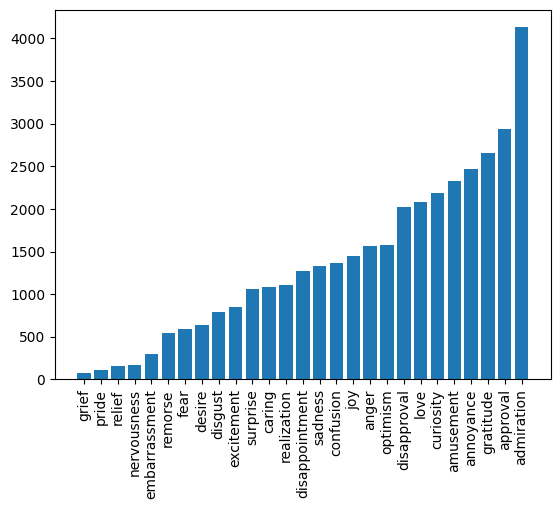

In [9]:
# We see the balance of the dataset
import matplotlib.pyplot as plt
from collections import Counter

ignore = label2id["neutral"]

labels = [id2label[label] for labels in dataset["train"]["labels"] for label in labels if label != ignore]
counter = Counter(labels)

counter = dict(sorted(counter.items(), key=lambda item: item[1]))

plt.bar(counter.keys(), counter.values())
plt.xticks(rotation=90)
plt.show()

In [10]:
for i, entry in enumerate(dataset["train"]):
    if len(entry["labels"]) > 3:
        print(i, entry["text"])
        print("is:", *ids2labels(entry["labels"]), sep="\n  - ")
        print()
        break

129 Tournament was a blast met some really cool people loved it all. Thanks for holding it. Would love to do it again someday
is:
  - admiration
  - desire
  - gratitude
  - joy



## Préparation des données

In [11]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("roberta-base")

In [12]:
tokenizer("Hello, this one is a test!", padding="max_length", truncation=True) #return_tensors="pt")

{'input_ids': [0, 31414, 6, 42, 65, 16, 10, 1296, 328, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [13]:
from sklearn.preprocessing import MultiLabelBinarizer

encoder = MultiLabelBinarizer()
encoder.fit([list(label2id.values())])

def preprocess_function(examples):
    text_tokenized = tokenizer(examples["text"], padding="max_length", truncation=True)
    labels_encoded = encoder.transform(examples["labels"])
    return {**text_tokenized, "labels": labels_encoded}



tokenized_datasets = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/43410 [00:00<?, ? examples/s]

Map:   0%|          | 0/5426 [00:00<?, ? examples/s]

Map:   0%|          | 0/5427 [00:00<?, ? examples/s]

In [14]:
for i, entry in enumerate(tokenized_datasets["train"]):
    if sum(entry["labels"]) > 3:
        print(entry)
        break

{'text': 'Tournament was a blast met some really cool people loved it all. Thanks for holding it. Would love to do it again someday', 'labels': [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'id': 'edycw66', 'input_ids': [0, 565, 37535, 21, 10, 7814, 1145, 103, 269, 3035, 82, 2638, 24, 70, 4, 4557, 13, 1826, 24, 4, 11258, 657, 7, 109, 24, 456, 23090, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Fine-tunning du modèle pré-entrainé

Chargement du modèle pré-entrainé

In [15]:
from transformers import RobertaForSequenceClassification

model = RobertaForSequenceClassification.from_pretrained(
    "roberta-base",
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id,
    problem_type="multi_label_classification", 
)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and in

Création de la fonction d'évaluation

In [16]:
import evaluate

accuracy = evaluate.load("accuracy")

In [17]:
import numpy as np
def compute_metrics(p):
    # TO CHECK
    print("CALLLLEDDD")
    logits, labels = p
    predictions = np.argmax(logits, axis=-1)
    return accuracy.compute(predictions=predictions, references=labels)

Création du Trainer

In [18]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    "test-emotions",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

In [19]:
tokenized_datasets["train"]

Dataset({
    features: ['text', 'labels', 'id', 'input_ids', 'attention_mask'],
    num_rows: 43410
})

In [20]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [21]:
# Now, the big moment
trainer.train()

  0%|          | 0/16281 [00:00<?, ?it/s]

RuntimeError: result type Float can't be cast to the desired output type Long